In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import io
import requests

url1 = "https://raw.githubusercontent.com/SzMatej/IAU_2020-2021/main/65/other_train.csv"
url2 = "https://raw.githubusercontent.com/SzMatej/IAU_2020-2021/main/65/personal_train.csv"

db1 = requests.get(url1).content
db2 = requests.get(url2).content
train = pd.read_csv(io.StringIO(db1.decode('utf-8')))
other = pd.read_csv(io.StringIO(db2.decode('utf-8')))

In [3]:
train.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Jason Michaels,"498 Kristin Courts Apt. 179\nWest Teresaport, ...",White,Married-civ-spouse,Prof-specialty,t,14.0,Husband,0.0,Masters,270092.0,0.0,>50K,"{'mean_glucose':'111.8125','std_glucose':'44.8...",United-States,40.0,0.0,Private
1,1,Thomas Flynn,"92949 Wall Drives Apt. 679\nNew Tinaburgh, MT ...",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,34278.0,1.0,>50K,"{'mean_glucose':'71.3984375','std_glucose':'47...",United-States,50.0,0.0,Private
2,2,John Cato,"99749 Michael Unions\nScottstad, IN 48755",White,Married-civ-spouse,Prof-specialty,f,14.0,Husband,0.0,Masters,107302.0,1.0,>50K,"{'mean_glucose':'102.796875','std_glucose':'37...",United-States,60.0,0.0,Private
3,3,John Mcdonald,"241 Michael Plains\nPort Stephanie, OH 65606",White,Married-civ-spouse,Adm-clerical,f,13.0,Husband,0.0,Bachelors,51089.0,1.0,>50K,"{'mean_glucose':'54.2578125','std_glucose':'41...",United-States,50.0,0.0,Federal-gov
4,4,Daniel Arreola,"4206 Tiffany Land Apt. 402\nSouth Michael, SC ...",White,Married-civ-spouse,Sales,FALSE,10.0,Husband,0.0,Some-college,32950.0,0.0,<=50K,"{'mean_glucose':'125.4921875','std_glucose':'5...",United-States,37.0,1902.0,Federal-gov


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3960 non-null   object 
 4   marital-status  3967 non-null   object 
 5   occupation      3962 non-null   object 
 6   pregnant        3969 non-null   object 
 7   education-num   3569 non-null   float64
 8   relationship    3967 non-null   object 
 9   capital-gain    3963 non-null   float64
 10  education       3968 non-null   object 
 11  fnlwgt          3965 non-null   float64
 12  class           3964 non-null   float64
 13  income          3968 non-null   object 
 14  medical_info    3965 non-null   object 
 15  native-country  3969 non-null   object 
 16  hours-per-week  3961 non-null   float64
 17  capital-loss    3968 non-null   f

In [5]:
for x in train.columns:
    if (train[x].dtype == 'O'):
        print(x)
        print(train[x].unique())
        print()

name
['Jason Michaels' 'Thomas Flynn' 'John Cato' ... 'Alexander Ramon'
 'Ismael Petronella' 'Robert Edge']

address
['498 Kristin Courts Apt. 179\nWest Teresaport, MS 31418'
 '92949 Wall Drives Apt. 679\nNew Tinaburgh, MT 94939'
 '99749 Michael Unions\nScottstad, IN 48755' ...
 '80904 Johnson Forks\nEast Johnnychester, NE 59766'
 '944 Carrie Mall Apt. 017\nWilsonmouth, MO 77627'
 '29674 Debra Brooks Suite 737\nWest Melissa, OH 58782']

race
[' White' ' Black' ' Other' ' Amer-Indian-Eskimo' nan
 ' Asian-Pac-Islander']

marital-status
[' Married-civ-spouse' ' Never-married' ' Separated' ' Divorced'
 ' Married-spouse-absent' ' Widowed' nan ' Married-AF-spouse']

occupation
[' Prof-specialty' ' Sales' ' Adm-clerical' ' Craft_repair'
 ' Prof_specialty' ' Priv-house-serv' ' ?' ' Craft-repair'
 ' Other-service' ' Exec-managerial' ' Farming-fishing'
 ' Machine_op_inspct' ' Transport_moving' ' Handlers-cleaners'
 ' Transport-moving' ' Tech-support' ' Other_service' ' Exec_managerial'
 ' Farmin

In [6]:
train.isnull().sum()

Unnamed: 0          0
name                0
address             0
race               23
marital-status     16
occupation         21
pregnant           14
education-num     414
relationship       16
capital-gain       20
education          15
fnlwgt             18
class              19
income             15
medical_info       18
native-country     14
hours-per-week     22
capital-loss       15
workclass          12
dtype: int64

<AxesSubplot:>

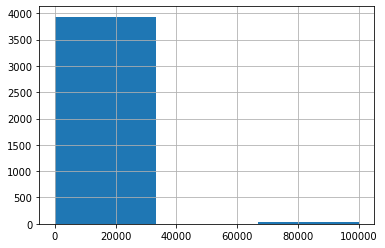

In [22]:
train["capital-gain"].hist(bins=3)

array([[<AxesSubplot:title={'center':'capital-gain'}>]], dtype=object)

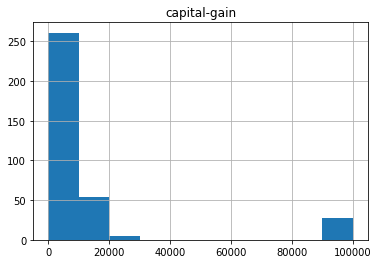

In [14]:
train[train["capital-gain"] != 0.0].hist("capital-gain")